<a href="https://colab.research.google.com/github/Ristoll/AIS_Labs/blob/main/LR_10_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ADABOOST REGRESSOR
Mean squared error = 1.18
Explained variance score = 0.47


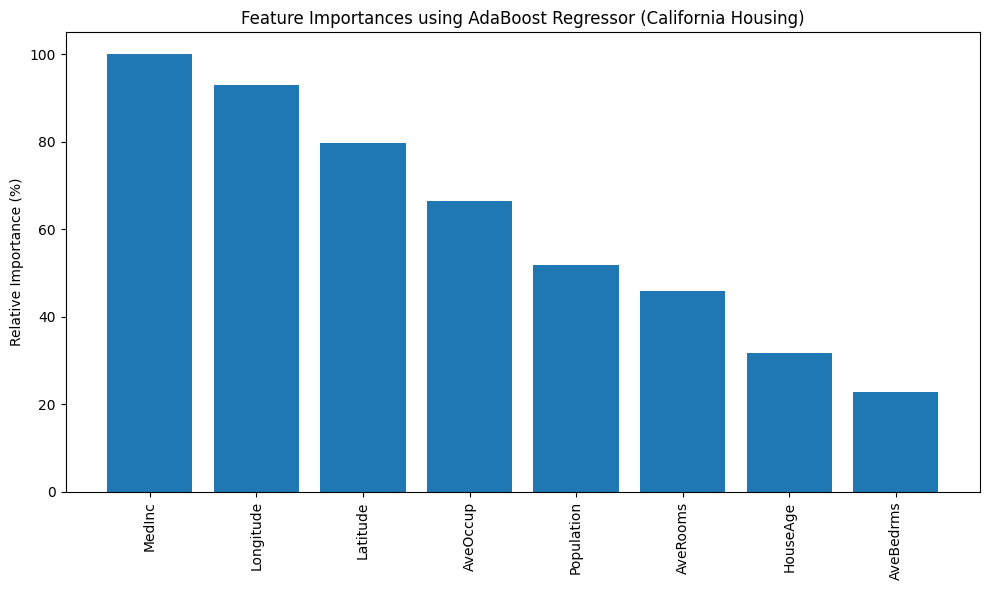

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Завантаження та перемішування даних
housing_data = fetch_california_housing()
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

# Створення та навчання регресора AdaBoost
regressor = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4),
    n_estimators=400,
    random_state=7
)
regressor.fit(X_train, y_train)

# Оцінка ефективності
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("\nADABOOST REGRESSOR")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

# Відносна важливість ознак
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names
feature_importances = 100.0 * (feature_importances / max(feature_importances))

index_sorted = np.flipud(np.argsort(feature_importances))
pos = np.arange(index_sorted.shape[0]) + 0.5

plt.figure(figsize=(10, 6))
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, np.array(feature_names)[index_sorted], rotation=90)
plt.ylabel('Relative Importance (%)')
plt.title('Feature Importances using AdaBoost Regressor (California Housing)')
plt.tight_layout()
plt.show()
